## <span style="color:blue">**'탐색적 데이터 분석(EDA)’**은 우리가 존재한다고 믿는 것들은 물론이고 존재하지 않는다고 믿는 것들을 발견하려는 태도, 유연성, 그리고 자발성이다.  - 존 튜키 </span>

### (1) 데이터에 대한 질문 & 문제 만들기
### (2) 데이터를 시각화하고, 변환하고, 모델링하여 그 질문 & 문제에 대한 답을 찾아보기
### (3) 찾는 과정에서 배운 것들을 토대로 다시 질문을 다듬고 또 다른 질문 & 문제 만들기

#### <span style="color:red">전체적으로 데이터의 속성들을 살펴본다 - 결측치와 이상치 채크와 대처</span>
#### <span style="color:red">속성 간의 관계 분석한다 - 타입, 범주형 연속형 채크, 시각화와 상관계수를 통한 상관성 채크</span>

## **EDA의 핵심 - 데이터의 결측치와 특이값(이상치) 채크와 처리**
### 데이터 읽어서 정보 보기

In [2]:
import pandas as pd
bank_df = pd.read_csv('data/bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [3]:
# 데이터의 건수, 항목수를 확인
print(bank_df.shape)

# 데이터형을 확인
print(bank_df.dtypes)

(7234, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [4]:
# 데이터에 대한 여러가지 정보들을 한번에 출력
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7234 non-null   int64 
 1   job        7190 non-null   object
 2   marital    7234 non-null   object
 3   education  6961 non-null   object
 4   default    7234 non-null   object
 5   balance    7234 non-null   int64 
 6   housing    7234 non-null   object
 7   loan       7234 non-null   object
 8   contact    5196 non-null   object
 9   day        7234 non-null   int64 
 10  month      7234 non-null   object
 11  duration   7234 non-null   int64 
 12  campaign   7234 non-null   int64 
 13  pdays      7234 non-null   int64 
 14  previous   7234 non-null   int64 
 15  poutcome   1334 non-null   object
 16  y          7234 non-null   object
dtypes: int64(7), object(10)
memory usage: 960.9+ KB


In [5]:
# 기술 통계량 확인
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


### 데이터 변환

In [6]:
food = {'menu': ['짜장면', '짬뽕', '탕수육'], 'price' : ['7,000원','8,000원', '10,000원'], 'discountprice' : ['6,000원','7,000원', '8,000원'] }
df = pd.DataFrame(food)
df

,menu,price,discountprice
0,짜장면,"7,000원","6,000원"
1,짬뽕,"8,000원","7,000원"
2,탕수육,"10,000원","8,000원"


In [7]:
df.dtypes

menu             object
price            object
discountprice    object
dtype: object

In [8]:
df[['price','discountprice']] = df[['price','discountprice']].apply(lambda x : x.str.replace(',','').str.replace('원','').astype(int)) 

In [9]:
df

,menu,price,discountprice
0,짜장면,7000,6000
1,짬뽕,8000,7000
2,탕수육,10000,8000


In [10]:
df.dtypes

menu             object
price             int32
discountprice     int32
dtype: object

In [11]:
food = {'menu': ['짜장면', '짬뽕', '탕수육'], 'price' : ['7,000원','8,000원', '10,000원'], 'discountprice' : ['6,000원','7,000원', '8,000원'] }
df = pd.DataFrame(food)
df

,menu,price,discountprice
0,짜장면,"7,000원","6,000원"
1,짬뽕,"8,000원","7,000원"
2,탕수육,"10,000원","8,000원"


In [12]:
import re
df.price = df.price.apply(lambda x :re.sub('[,원]','', x)).map(int)

In [13]:
df.discountprice = df.discountprice.apply(lambda x :re.sub('[,원]','', x)).map(int)

In [14]:
df

,menu,price,discountprice
0,짜장면,7000,6000
1,짬뽕,8000,7000
2,탕수육,10000,8000


In [15]:
df.dtypes

menu             object
price             int64
discountprice     int64
dtype: object

### 결측치 확인하기

In [16]:
bank_df.isna().sum() 

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64

<AxesSubplot:>

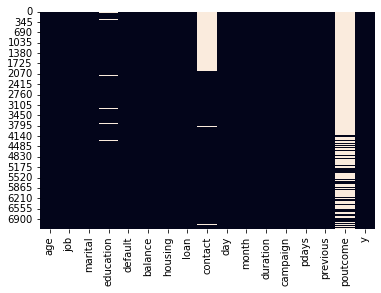

In [17]:
import seaborn as sns
sns.heatmap(bank_df.isnull(), cbar=False)

<AxesSubplot:>

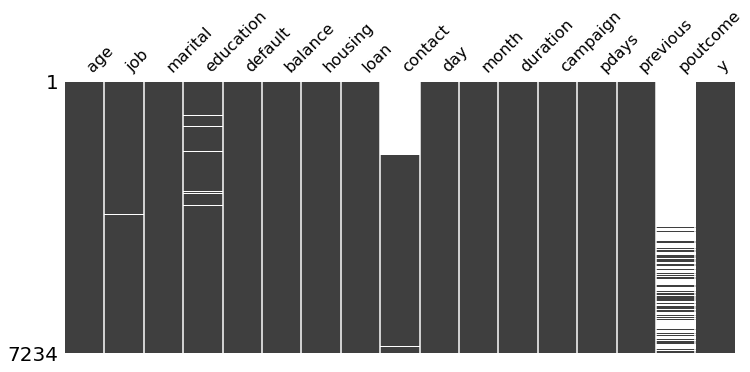

In [18]:
import missingno as msno 
msno.matrix(bank_df, figsize=(12,5), sparkline=False)

### 바로 위의 셀에서 missingo 오류가 발생하면 다음 셀을 실행시킵니다.

<AxesSubplot:>

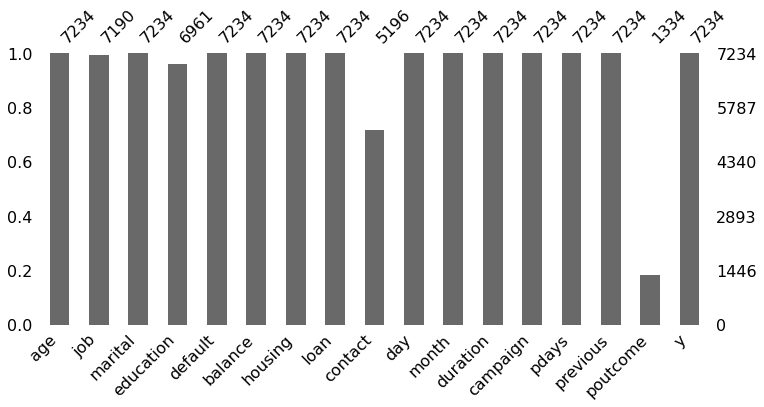

In [19]:
msno.bar(bank_df, figsize=(12,5))

### 결측치를 포함한 행 삭제

In [20]:
# job과 education 열에서 결측치가 포함된 행을 삭제
bank_df = bank_df.dropna(subset=['job', 'education'])

# 데이터의 건수, 항목수를 확인
print(bank_df.shape)

(6935, 17)


### 결측치를 2400개이상 포함한 열 삭제

In [21]:
# 결측치이 2400개 이상인 열을 제외
bank_df = bank_df.dropna(thresh=2400, axis=1) # axis 중요!!!

# 데이터의 건수, 항목수를 확인
print(bank_df.shape)
print(bank_df.info())

(6935, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6935 entries, 0 to 7233
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        6935 non-null   int64 
 1   job        6935 non-null   object
 2   marital    6935 non-null   object
 3   education  6935 non-null   object
 4   default    6935 non-null   object
 5   balance    6935 non-null   int64 
 6   housing    6935 non-null   object
 7   loan       6935 non-null   object
 8   contact    5010 non-null   object
 9   day        6935 non-null   int64 
 10  month      6935 non-null   object
 11  duration   6935 non-null   int64 
 12  campaign   6935 non-null   int64 
 13  pdays      6935 non-null   int64 
 14  previous   6935 non-null   int64 
 15  y          6935 non-null   object
dtypes: int64(7), object(9)
memory usage: 921.1+ KB
None


### 결측치 채우기

In [22]:
# 결측치을 「unknown」으로 치환
bank_df = bank_df.fillna({'contact':'unknown'})

# 선두에서 5행까지 표시
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,no
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,no


In [23]:
import numpy as np
time_index = pd.date_range("2020-01-01", periods=5, freq="MS")

dataframe = pd.DataFrame(index=time_index)

dataframe["Sales"] = [1.0,2.0,np.nan,np.nan,5.0]
dataframe

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,NaN
2020-04-01,NaN
2020-05-01,5.0


![](images/fill.jpg)

In [24]:
# 누락된 값을 보간합니다.
dataframe.interpolate()

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,3.0
2020-04-01,4.0
2020-05-01,5.0


In [25]:
# 앞쪽으로 채우기(Forward-fill)
dataframe.ffill()

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,2.0
2020-04-01,2.0
2020-05-01,5.0


In [26]:
dataframe.fillna(method ='ffill') 

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,2.0
2020-04-01,2.0
2020-05-01,5.0


In [27]:
# 뒤쪽으로 채우기(Back-fill)
dataframe.bfill()

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,5.0
2020-04-01,5.0
2020-05-01,5.0


In [28]:
dataframe.fillna(method ='bfill') 

,Sales
2020-01-01,1.0
2020-02-01,2.0
2020-03-01,5.0
2020-04-01,5.0
2020-05-01,5.0


In [29]:
dict = {'One' :  [np.nan, np.nan, 95, 80], 
    'Two' : [np.nan, np.nan, np.nan, np.nan], 
    'Three':[52, np.nan, 80, 98], 
    'Four':[np.nan, np.nan, np.nan, 65],
    'Five':[10, None, 30, 40],
    'Six': [np.nan, np.nan, np.nan, pd.NaT],
    'Seven': [np.nan, np.nan, None, np.nan],
    'Eight': [np.nan, np.nan, None, pd.NaT]} 

df = pd.DataFrame(dict)
display(df)

,One,Two,Three,Four,Five,Six,Seven,Eight
0,NaN,NaN,52.0,NaN,10.0,NaT,NaN,NaT
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
2,95.0,NaN,80.0,NaN,30.0,NaT,NaN,NaT
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [30]:
df.dropna(how = 'all') 

,One,Two,Three,Four,Five,Six,Seven,Eight
0,NaN,NaN,52.0,NaN,10.0,NaT,NaN,NaT
2,95.0,NaN,80.0,NaN,30.0,NaT,NaN,NaT
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [31]:
df.dropna(how = 'all', axis=1) 

,One,Three,Four,Five
0,NaN,52.0,NaN,10.0
1,NaN,NaN,NaN,NaN
2,95.0,80.0,NaN,30.0
3,80.0,98.0,65.0,40.0


In [31]:
df.dropna(subset=['One', 'Four'])

,One,Two,Three,Four,Five,Six,Seven,Eight
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [32]:
df.dropna(subset=['Eight'])

,One,Two,Three,Four,Five,Six,Seven,Eight


In [33]:
df.isna()

,One,Two,Three,Four,Five,Six,Seven,Eight
0,True,True,False,True,False,True,True,True
1,True,True,True,True,True,True,True,True
2,False,True,False,True,False,True,True,True
3,False,True,False,False,False,True,True,True


In [34]:
df.isna().sum()

One      2
Two      4
Three    1
Four     3
Five     1
Six      4
Seven    4
Eight    4
dtype: int64

In [35]:
dict = {'First Score':[100, 90, None, 95, 85], 
        'Second Score': [30, 45, None, np.nan, 60], 
        'Third Score':[np.nan, 40, np.nan, 80, None]} 
df = pd.DataFrame(dict) 
display(df)

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,NaN,NaN
3,95.0,NaN,80.0
4,85.0,60.0,NaN


In [36]:
df.isna()

,First Score,Second Score,Third Score
0,False,False,True
1,False,False,False
2,True,True,True
3,False,True,False
4,False,False,True


In [37]:
df.fillna(0) 

,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,0.0,0.0
3,95.0,0.0,80.0
4,85.0,60.0,0.0


In [38]:
df.fillna(method ='ffill') 

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,90.0,45.0,40.0
3,95.0,45.0,80.0
4,85.0,60.0,80.0


In [39]:
df.fillna(method ='bfill')  

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,95.0,60.0,80.0
3,95.0,60.0,80.0
4,85.0,60.0,NaN


In [40]:
df.replace(to_replace = np.nan, value = -50)

,First Score,Second Score,Third Score
0,100.0,30.0,-50.0
1,90.0,45.0,40.0
2,-50.0,-50.0,-50.0
3,95.0,-50.0,80.0
4,85.0,60.0,-50.0


In [41]:
df.interpolate(limit_direction ='forward') 

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,92.5,50.0,60.0
3,95.0,55.0,80.0
4,85.0,60.0,80.0


In [42]:
df.interpolate(limit_direction ='backward') 

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,92.5,50.0,60.0
3,95.0,55.0,80.0
4,85.0,60.0,NaN


In [43]:
df.interpolate(limit_direction ='both')  ### ㅎㅎㅎ 이겁니다...

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,92.5,50.0,60.0
3,95.0,55.0,80.0
4,85.0,60.0,80.0


### ‘맛있는 요리’를 만들기 위해서는 가장 먼저 ‘맛있는 음식재료’를 준비해야 하듯이 데이터 분석에서 맛있는 
### 음식재료라고 할 수 있는 EDA가 중요하다는 말이 있다. 원(raw) 데이터를 다양한 방면으로
### 관찰하면서 인사이트를 이끌어 낼 수 있다는 것이 EDA의 중요성이다.
----

## **EDA 작업이후 데이터 전처리에서 필요한 작업 - 범주형 데이터 전처리**
### 범주형(정성적 속성) 변수의 값을 수치로 변환
#### 사이킷런은 문자열 값을 입력 값으로 처리 하지 않기 때문에 숫자 형으로 변환해야 함
##### 범주형 변수의 경우 전처리를 통해 정수값으로 변환
##### 범주형이 아닌 단순 문자열인 경우 일반적으로 제거

### 범주형 변수(피쳐)의 처리 방법
### - 레이블 인코딩
### - 더미화(원 핫 인코딩)

----

### 레이블 인코딩(Label encoding)
#### 문자열(범주형) 값을 0 부터 1씩 증가하는 값으로 변환
#### 숫자의 차이가 모델에 영향을 주지 않는 트리 계열 모델(의사결정나무, 랜덤포레스트)에 적용 가능
#### 숫자의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에는 사용하지 않음

In [33]:
# yes를 1、no를 0으로 치환
bank_df = bank_df.replace('yes', 1)
bank_df = bank_df.replace('no', 0)

# 선두에서 5행까지 표시
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,0
1,36,technician,single,secondary,0,265,1,1,unknown,5,may,348,1,-1,0,0
2,25,blue-collar,married,secondary,0,-7,1,0,unknown,5,may,365,1,-1,0,0
3,53,technician,married,secondary,0,-3,0,0,unknown,5,may,1666,1,-1,0,0
4,24,technician,single,secondary,0,-103,1,1,unknown,5,may,145,1,-1,0,0


### sklearn.preprocessing.LabelEncoder 사용
#### <span style="color:red">fit() : 어떻게 변환할 지 학습</span>
#### <span style="color:red">transform(): 문자열를 숫자로 변환</span>
#### <span style="color:red">fit_transform() : 학습과 변환을 한번에 처리 (fit + transform)</span>
#### inverse_transform() : 숫자를 문자열로 변환
#### classes_ : 인코딩한 클래스(레벨) 조회

In [34]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
items = ['TV','TV','냉장고','컴퓨터','냉장고','컴퓨터', '에어콘']
le = LabelEncoder()
le.fit(items) 
label = le.transform(items)

print(label, type(label))
print(le.classes_)
print(le.inverse_transform(label))

[0 0 1 3 1 3 2] <class 'numpy.ndarray'>
['TV' '냉장고' '에어콘' '컴퓨터']
['TV' 'TV' '냉장고' '컴퓨터' '냉장고' '컴퓨터' '에어콘']


In [35]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None, names=cols, na_values=' ?')
print(df.shape)   # (32561, 15)
df = df.dropna()
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### encoding_columns 레이블 인코딩 처리
#### -범주형: 'workclass','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender', 'hours-per-week','native-country', 'income'
#### -연속형: 'age', fnlwgt', 'capital-gain', 'capital-loss'

In [36]:
encoding_columns = ['workclass','education','marital-status', 'occupation','relationship','race','gender','native-country', 'income']
not_encoding_columns = ['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']

In [37]:
enc_classes = {} 
def encoding_label_func(x):  #x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    label = le.fit_transform(x)

    enc_classes[x.name] = le.classes_   #x.name: 컬럼명

    return label

In [38]:
d1 = df[encoding_columns].apply(encoding_label_func)
d2 = df[not_encoding_columns]
data = d1.join(d2)
data.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,5,9,4,0,1,4,1,38,0,39,77516,13,2174,0,40
1,4,9,2,3,0,4,1,38,0,50,83311,13,0,0,13
2,2,11,0,5,1,4,1,38,0,38,215646,9,0,0,40
3,2,1,2,5,0,2,1,38,0,53,234721,7,0,0,40
4,2,9,2,9,5,2,0,4,0,28,338409,13,0,0,40


---
### **더미화 - 원핫 인코딩(One-Hot encoding)**
#### N개의 클래스를 N 차원의 One-Hot 벡터로 표현되도록 변환
#### 고유값들을 피처로 만들고 정답에 해당하는 열은 1로 나머진 0으로 표시
#### 변환해야 하는 값의 종류가 여러 개일 때
#### 숫자의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에서 범주형 데이터 변환시 라벨 인코딩 보다 원핫 인코딩을 사용

----
### [판다스]
#### <span style="color:red">pandas.get_dummies(DataFrame [, columns=[변환할 컬럼명]])</span> 함수 이용
#### DataFrame에서 범주형(문자열) 변수만 변환
----
### [사이킷런]
#### <span style="color:red">sklearn.preprocessing.OneHotEncoder</span> 이용
#### fit(): 어떻게 변환할 지 학습
#### transform(): 문자열를 숫자로 변환
#### fit_transform(): 학습과 변환을 한번에 처리
#### get_feature_names() : 원핫인코딩으로 변환된 컬럼의 이름을 반환
#### DataFrame을 넣을 경우 모든 변수들을 변환하므로 범주형 컬럼만 처리하도록 해야 함
----

![](images/onehot.png)

### **pandas의 get_dummies 기능을 활용한 인코딩**

In [50]:
import pandas as pd
df = pd.DataFrame({'item' : ['TV', '냉장고', '전자레인지', '컴퓨터', 'TV', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,0,1,0,0,0
8,0,0,1,0,0,0


In [51]:
pd.get_dummies(df, prefix="my")

,my_TV,my_냉장고,my_믹서,my_선풍기,my_전자레인지,my_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,0,1,0,0,0
8,0,0,1,0,0,0


In [52]:
fruit = pd.DataFrame({'name':['apple', 'banana', 'cherry', 'durian', np.nan],
                      'color':['red', 'yellow', 'red', 'green', np.nan]})
fruit

,name,color
0,apple,red
1,banana,yellow
2,cherry,red
3,durian,green
4,NaN,NaN


In [53]:
pd.get_dummies(fruit)

,name_apple,name_banana,name_cherry,name_durian,color_green,color_red,color_yellow
0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0
3,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0


In [54]:
pd.get_dummies(fruit, columns = ['name'])

,color,name_apple,name_banana,name_cherry,name_durian
0,red,1,0,0,0
1,yellow,0,1,0,0
2,red,0,0,1,0
3,green,0,0,0,1
4,NaN,0,0,0,0


In [55]:
pd.get_dummies(fruit['name'])

,apple,banana,cherry,durian
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,0


In [56]:
pd.get_dummies(fruit['name'], dummy_na = True)

,apple,banana,cherry,durian,NaN
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [57]:
bank_df['job'].unique()

array(['management', 'technician', 'blue-collar', 'retired', 'services',
       'admin.', 'entrepreneur', 'self-employed', 'unemployed', 'student',
       'housemaid'], dtype=object)

In [58]:
bank_df['job'].value_counts()

management       1529
blue-collar      1431
technician       1163
admin.            817
services          641
retired           332
self-employed     250
entrepreneur      227
unemployed        218
housemaid         199
student           128
Name: job, dtype: int64

In [59]:
# job을 더미 변수로 변경
bank_df_job = pd.get_dummies(bank_df['job'])

# 선두에서 5행까지 표시
bank_df_job.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0


In [60]:
# marital을 더미 변수로 변경
bank_df_marital = pd.get_dummies(bank_df['marital'])
bank_df_education = pd.get_dummies(bank_df['education'])
bank_df_contact = pd.get_dummies(bank_df['contact'])
bank_df_month = pd.get_dummies(bank_df['month'])

# 선두에서 5행까지 표시
display(bank_df_marital.head())
display(bank_df_education.head())
display(bank_df_contact.head())
display(bank_df_month.head())

,divorced,married,single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


,primary,secondary,tertiary
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


,cellular,telephone,unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [61]:
# 원래의 데이터 세트에서 수치항목을 추출
tmp1 = bank_df[['age', 'default', 'balance', 'housing', 'loan',
                'day', 'duration', 'campaign', 'pdays', 'previous', 'y']]

# 선두에서 5행까지 표시
tmp1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,36,0,265,1,1,5,348,1,-1,0,0
2,25,0,-7,1,0,5,365,1,-1,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,0
4,24,0,-103,1,1,5,145,1,-1,0,0


In [62]:
# 수평결합
tmp2 = pd.concat([tmp1, bank_df_marital], axis=1)
tmp3 = pd.concat([tmp2, bank_df_education], axis=1)
tmp4 = pd.concat([tmp3, bank_df_contact], axis=1)
bank_df_new = pd.concat([tmp4, bank_df_month], axis=1)

print(bank_df_new)
# 선두에서 5행까지 표시
bank_df_new.head()

      age  default  balance  housing  loan  day  duration  campaign  pdays  \
0      58        0     2143        1     0    5       261         1     -1   
1      36        0      265        1     1    5       348         1     -1   
2      25        0       -7        1     0    5       365         1     -1   
3      53        0       -3        0     0    5      1666         1     -1   
4      24        0     -103        1     1    5       145         1     -1   
...   ...      ...      ...      ...   ...  ...       ...       ...    ...   
7229   25        0      199        0     0   16       173         1     92   
7230   28        0      159        0     0   16       449         2     33   
7231   59        0      138        1     1   16       162         2    187   
7232   37        0     1428        0     0   16       333         2     -1   
7233   25        0      505        0     1   17       386         2     -1   

      previous  ...  dec  feb  jan  jul  jun  mar  may  nov  oc

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
bank_df_new.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [64]:
# 전처리한 결과를 CSV파일로 출력
bank_df_new.to_csv('output/bank-prep.csv', index=False)

### 사이킷런에서 지원하는 원핫인코딩 구현
---
### LabelEncoder : 문자형태의 데이터로 구성된 피쳐를 수치화 함

### OneHotEncoder : 숫자로 표현된 범주형 데이터를 인코딩 
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;희소행렬(Sparse Matrix)로 만들어지므로 array로 만들려면 .toarray() 필요

In [65]:
import pandas as pd

In [66]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import numpy as np

In [67]:
items=['TV', '냉장고', '전자레인지', '컴퓨터', 'TV', '선풍기', '선풍기', '믹서', '믹서']
# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환합니다. 
labels = labels.reshape(-1,1)

In [68]:
print(labels)
print(encoder.classes_)      

[[0]
 [1]
 [4]
 [5]
 [0]
 [3]
 [3]
 [2]
 [2]]
['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [69]:
# 원-핫 인코딩을 적용
oh_encoder = OneHotEncoder(sparse=False)
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('희소행렬로 만들지 않은 원-핫 인코딩 데이터')
print(oh_labels)
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

희소행렬로 만들지 않은 원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(9, 6)


In [70]:
# 원-핫 인코딩을 적용
oh_encoder = OneHotEncoder(sparse=True)
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('희소행렬로 만든 원-핫 인코딩 데이터')
print(oh_labels)
print('2차원 구조로 변환한 원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

희소행렬로 만든 원-핫 인코딩 데이터
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 3)	1.0
  (7, 2)	1.0
  (8, 2)	1.0
2차원 구조로 변환한 원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(9, 6)


In [71]:
oh_encoder.get_feature_names_out()

array(['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5'], dtype=object)

### **LabelBinarizer** 클래스를 사용해서 (텍스트 범주에서 숫자 범주로 바꾸고, 숫자 범주에서 원-핫 벡터로 바꾸는) 두개의 변환을 한번에 적용할 수 있음

In [72]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
jobs_encoder = LabelBinarizer()

In [73]:
items=['TV', '냉장고', '전자레인지', '컴퓨터', 'TV', '선풍기', '선풍기', '믹서', '믹서']

In [74]:
jobs_encoder.fit(items)
transformed = jobs_encoder.transform(items)
transformed

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [75]:
jobs_encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터'], dtype='<U5')

In [76]:
ohe_df = pd.DataFrame(transformed, columns=jobs_encoder.classes_)
ohe_df

,TV,냉장고,믹서,선풍기,전자레인지,컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,0,1,0,0,0
8,0,0,1,0,0,0


----
## **EDA 작업이후 데이터 전처리에서 필요한 작업 - 수치형 데이터 전처리**
### 각 열(변수, 피처, 속성)이 가지는 값들의 숫자 범위(Scale)가 다를 경우 이 값의 범위를 일정한 범위로 맞추는 작업

### **스케일링**

### 데이터 분석을 수행하면서 많이 겪는 문제중 하나가 <span style="color:red">데이터 단위의 불일치</span>임
### 칼럼간에 데이터의 단위가 다르면 칼럼마다 스케일이 크게 차이가 나게 되고 분석 결과에 영향을 주게 된다.
### 이를 해결하는 방법으로 <span style="color:blue">Normalization(정규화)</span>가 있음 


#### 머신러닝을 위한 데이터셋을 정제할 때, 특성별로 데이터의 스케일이 다르다면 어떤 일이 벌어질까?
예를 들어, X1은 0부터 1 사이의 값을 갖고
X2는 1000000부터 1000000000000 사이의 값을 갖고
y는 1000000부터 100000000 사이의 값을 갖는다고 가정하면
사실, X1 특성은 y를 예측하는데 큰 영향을 주지 않는 것으로 생각할 수 있다.
물론, 이 외에도 overflow, underflow, 발산 수렴 등의 문제가 있다.
때문에 특성별로 데이터의 스케일이 다르다면 머신러닝이 잘 동작하지 않게 된다.
따라서, 데이터 스케일링 작업을 통해, 모든 특성의 범위(또는 분포)를 같게 만들어줘야 한다.

***
### scikit-learn의 scaler를 사용하기 이전에 주의 해야할 점
#### scaler는 fit과 transform 메서드를 지원한다.
#### fit 메서드로 데이터의 분포를 추정하고, transform 메서드로 실제 데이터의 스케일을 조정한다.
#### **fit 메서드는 훈련 데이터에만 적용하고 이후에 transform 메서드를 훈련 데이터와 테스트 데이터에 적용**한다.
#### scaler는 fit_transform()이란 단축 메서드를 제공한다.
#### 훈련 데이터에는 fit_transform()메서드를 적용하고, 테스트 데이터에는 transform()메서드를 적용한다.
#### 일반적으로 타겟(y) 데이터에 대한 스케일링은 진행하지 않는다.
스케일링할 때에, 모든 특성의 범위를 유사하게 만드는 것은 중요하지만, 그렇다고 반드시 같은 분포로 만들 필요는 없다.
스케일링 할 때에, sklearn 모듈을 사용하면 데이터프레임 전체를 한번에 변환가능하나, 특성에 따라 각기 다른 스케일링을 적용하는게 유리할 경우도 있다.

---
### **[ Min-Max 스케일링(정규화) ]**
### 데이터의 상대적 크기에 대한 영향을 줄이기 위해 데이터범위를 0~1로 변환 - MinMax스케일러라고도 함
### 2개 이상의 대상 컬럼(변수, 피쳐, 속성)의 단위가 다를 때 대상 데이터를 같은 기준으로 볼 수 있게 함
### 데이터가 평균으로부터 얼마나 떨어져있는지 나타내는 값으로, 특정 범위를 벗어난 데이터는 outlier로 간주, 제거 
### 분류보다는 회귀에 유용
## 식 : <span style="color:red">(측정값 - 최소값) / (최대값 - 최소값)</span>
## sklearn.preprocessing 의 MinMaxScaler 사용

---
### **[ Z-score 스케일링(표준화) ]** 
### 피쳐의 값들이 평균이 0이고 표준편차가 1인 범위(표준정규분포)에 있도록 변환
### 데이터가 평균으로부터 얼마나 떨어져있는지 나타내는 값으로, 특정 범위를 벗어난 데이터는 outlier로 간주, 제거 
### 데이터를 0을 중심으로 양쪽으로 데이터를 분포시키는 방법
###  Z-score 스케일링을 하면 각 데이터들이 평균을 기준으로 얼마나 떨어져 있는지를 나타내는 값으로 변환됨
###  회귀 보다는 분류에 유용
## 식(Z-score 표준화) : <span style="color:red">(측정값 - 평균) / 표준편차</span>
## sklearn.preprocessing 의 StandardScaler 사용
---

### sklearn.preprocessing의 MinMaxScaler 사용

In [ ]:
from sklearn.preprocessing import MinMaxScaler
a = [[10], [9], [8], [6], [2]]
print(a)
print(type(a))
print('-------- MinMaxScaling ---------')
scaler = MinMaxScaler(feature_range=(0,1))
a = scaler.fit_transform(a)
print(a)
print(type(a))

### sklearn.preprocessing의 StandardScaler 사용

In [ ]:
from sklearn.preprocessing import StandardScaler
a = [[10], [9], [8], [6], [2]]
print(a)
scaler = StandardScaler()
print('-------- StandardScaling ---------')
a = scaler.fit_transform(a)
print(a)
print('--------------------------------')
print('평균 : ', a.mean())
print('표준편차 : ', a.std())

# <span style="color:red">EDA와 데이터 전처리 리뷰 샘플</span>

## 타이타닉 데이터셋으로 진행한 EDA

캐글의 타이타닉 데이터셋 페이지 :  https://www.kaggle.com/c/titanic   

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
test_PassengerId = test_df["PassengerId"]

In [ ]:
train_df.columns

In [ ]:
train_df.head()

In [ ]:
train_df.describe()

In [ ]:
len(train_df)

## 변수 소개
* PassengerId: unique id number to each passenger
* Survived: passenger survive(1) or died(0)
* Pclass: passenger class
* Name: name
* Sex: gender of passenger
* Age: age of passenger
* SibSp: number of siblings/spouses
* Parch: number of parents/children
* Ticket: ticket number
* Fare: amount of money spent on ticket
* Cabin: cabin category
* Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
train_df.info()

## 범주형 변수들 값 갯수 시각화 - 막대그래프

In [ ]:
def bar_plot(variable):
    var = train_df[variable]
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [ ]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [ ]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))
    print("---------------------------------")

## 수치형 변수들 값 분포 시각화 - 히스토그램

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [ ]:
numericVar = ["Fare", "Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

## 기초 데이터 분석

* Pclass - 선실 등급에 따른 생존자 비율
* Sex - 성별에 따른 생존자 비율
* SibSp - 함께 탑승한 형제 또는 자매들의 명수에 따른 생존자 비율
* Parch - 부모와 자식이 함께 존재했는지에 따른 생존자 비율

In [ ]:
# 선실 등급에 따른 생존자 비율
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived")

In [ ]:
# 성별에 따른 생존자 비율
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived")

In [ ]:
# 함께 탑승한 형제 또는 자매들의 명수에 따른 생존자 비율
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived")

In [ ]:
# 부모와 자식이 함께 존재했는지에 따른 생존자 비율
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived")

## 이상치 채크와 삭제

In [ ]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [ ]:
train_df.iloc[27:90]

In [ ]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

In [ ]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

In [ ]:
train_df.info()

In [ ]:
train_df.iloc[27:90]

In [ ]:
## 결측치 채크와 채우기

In [ ]:
test_df.info()

In [ ]:
train_df_len = len(train_df)
train_df_len

In [ ]:
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [ ]:
train_df.info()

In [ ]:
train_df.head()

In [ ]:
train_df.columns[train_df.isnull().any()]

In [ ]:
train_df.isnull().sum()

In [ ]:
import missingno as msno 
msno.matrix(train_df, figsize=(12,5), sparkline=False)

In [ ]:
train_df[train_df["Embarked"].isnull()]

In [ ]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

In [ ]:
train_df[train_df["Fare"].isnull()]

In [ ]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [ ]:
train_df[train_df["Fare"].isnull()]

## 시각화를 통한 변수들간의 관계 파악

In [ ]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

In [ ]:
g = sns.catplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", ci=None)
g.set_ylabels("Survived Probability")
plt.show()

In [ ]:
g = sns.catplot(x = "Parch", y = "Survived", kind = "bar", data = train_df, ci=None)
g.set_ylabels("Survived Probability")
plt.show()

In [ ]:
g = sns.catplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar", ci=None)
g.set_ylabels("Survived Probability")
plt.show()

In [ ]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.histplot, "Age", bins = 25)
plt.show()

In [ ]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

In [ ]:
g = sns.FacetGrid(train_df, row = "Embarked")
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

In [ ]:
train_df[train_df["Age"].isnull()]

In [ ]:
sns.catplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

In [ ]:
sns.catplot(x = "Sex", y = "Age", hue = "Pclass",data = train_df, kind = "box")
plt.show()

In [ ]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

In [ ]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [ ]:
train_df[train_df["Age"].isnull()]

## 피쳐 엔지니어링

### Name -- Title

In [ ]:
train_df["Name"].head(10)

In [ ]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [ ]:
train_df["Title"].head(10)

In [ ]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

In [ ]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
g = sns.catplot(x = "Title", y = "Survived", data = train_df, kind = "bar", ci=None)
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [ ]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [ ]:
train_df.head()

In [ ]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

### Family Size

In [ ]:
train_df.head()

In [ ]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [ ]:
train_df.head()

In [ ]:
g = sns.catplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar", ci=None)
g.set_ylabels("Survival")
plt.show()

In [ ]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

In [ ]:
train_df.head(10)

In [ ]:
train_df.groupby("family_size").size()

In [ ]:
len(train_df)

In [ ]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

In [ ]:
g = sns.catplot(x = "family_size", y = "Survived", data = train_df, kind = "bar", ci=None)
g.set_ylabels("Survival")
plt.show()

In [ ]:
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

### Embarked

In [ ]:
train_df["Embarked"].head()

In [ ]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [ ]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

### Ticket

In [ ]:
train_df["Ticket"].head(20)

In [ ]:
a = "A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]

In [ ]:

tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [ ]:
train_df["Ticket"].head(20)

In [ ]:
train_df.head()

In [ ]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T")
train_df.head(10)

### Pclass

In [ ]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [ ]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

### Sex

In [ ]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

### Drop Passenger ID and Cabin

In [ ]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [ ]:
train_df.columns

## Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression


### Train - Test Split

In [ ]:
train_df_len

In [ ]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)

In [ ]:
test.head()

In [ ]:
from sklearn.model_selection import train_test_split

train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

### Simple Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

### https://www.kaggle.com/kanncaa1/dataiteam-titanic-eda